Kelompok 7

Anggota Kelompok:

- Ade Mulyana (2108799)
- Muhammad Alam Basalamah (2101677)
- Muhammad Rizki (2107922)
- Muhammad Yusuf Bahtiar (2107980)
- Rasyid Andriansyah (2101963)





Notebook ini berisi proses klasifikasi gambar dengan menggunakan Deep Learning. Instrumen yang digunakan yakni Tensorflow pada Google Collab.

untuk datasetnya sendiri mengambil dari situg Kaggle.com. dataset berisi gambar para pemain bola yang pernah mendapatkan title Golden Foot. berikut adalah tautan ke datasetnya: https://www.kaggle.com/datasets/balabaskar/golden-foot-football-players-image-dataset

dataset diimport ke google colab menggunakan API kaggle. sebelum memulai import dataset, kita perlu membuat akun kaggle untuk mendapatkan file 'kaggle.json' dari pengaturan akun Anda di situs web Kaggle dan menggunakannya untuk mengautentikasi akun Anda saat menggunakan API Kaggle. kaggle.json adalah file yang digunakan untuk mengautentikasi akun Kaggle Anda saat menggunakan API Kaggle. Anda dapat menggunakan API Kaggle untuk berinteraksi dengan platform Kaggle dan mengunduh dataset, data kompetisi, dan sumber daya lain yang tersedia di situs web.


#### Library

In [1]:
# Import library yang diperlukan

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#### Import dataset

In [2]:
# mengimport file kaggle.json ke folder content pada google colab
! chmod 600 /content/kaggle.json

In [3]:
#Import dataset dari kaggle, copy-kan API command dataset
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d balabaskar/golden-foot-football-players-image-dataset

golden-foot-football-players-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip dataset
! unzip golden-foot-football-players-image-dataset.zip -d train

In [5]:
# delete Folder yang tidak digunakan
import shutil

shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/alessandro_del_piero')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/andreas_iniesta')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/andriy_shevchenko')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/edinson_cavani')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/francesco_totti')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/gianlugi_buffon')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/iker_casillas')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/luka_modric')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/pavel_nedved')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/mohamed_salah')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/riyan_giggs')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/roberto_baggio')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/roberto_carlos')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/ronaldo_nazario')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/samuel_eto')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/zlatan_ibrahimovic')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/didier_drogba')
shutil.rmtree('/content/train/football_golden_foot/football_golden_foot/pele')



In [6]:
# memasukan folder dataset ke variabel data_dir
import pathlib
data_dir = '/content/train/football_golden_foot/football_golden_foot'
data_dir = pathlib.Path(data_dir)

#### Cek jumlah data

In [7]:
# cek jumlah instance dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1333


dari dataset terdapat 1333 total file dengan format jpg

#### Cek class

In [8]:
# Karena dataset ini disusun satu class satu directory dan instance berada di bawah directory class masing-masing, 
# maka kita dapat menghitung instance per class sebagai berikut
import os
list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")
for x in list_dir:
 print("{} = {} ".format(x,len(list(data_dir.glob('{}/*.jpg'.format(x))))))

Jumlah class: 4 
Jumlah instance per class
ronaldinho = 321 
lionel_messi = 332 
cristiano_ronaldo = 346 
diego_maradona = 334 


#### cek data

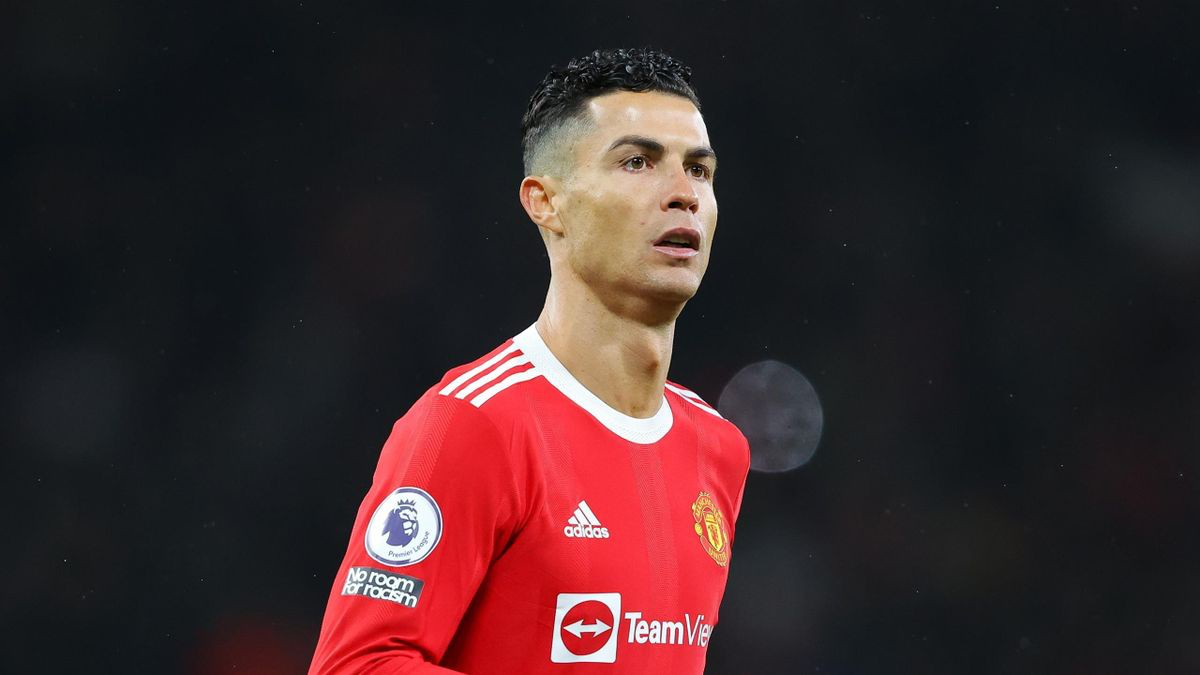

In [9]:
# Dataset ini memiliki 4 directory sesuai kelas: ronaldinho, lionel_messi, cristiano_ronaldo, diego_maradona.
# Coba cek isi salah satu gambarnya
# kelas yang dicek adalah cristiano ronaldo
roses = list(data_dir.glob('cristiano_ronaldo/*'))
PIL.Image.open(str(roses[4]))

#### dimensi

In [10]:
# Kita akan menggunakan library dari Keras. 
# Kita tentukan batch_size, batch adalah salah satu terobosan dari deep learning yang membuat training dapat dilakukan
# bertahap dengan sebagian data (batch).  img_height dan img_width adalah ukuran tinggi dan lebar dari gambar. 
# Keras akan membuat semua ukuran image yang beragam menjadi ukuran ini. 

batch_size = 32
img_height = 180
img_width = 180

#### data training

In [11]:
# Siapkan data training

train_ds = tf.keras.utils.image_dataset_from_directory(
 data_dir,
 validation_split=0.2,
 subset="training",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

# Seed adalah  bilangan yang bisa diisi berapa saja. Seed diperlukan karena proses pengambilan data training
# dilakukan secara random, penentuan nilai seed membuat data training yang dihasilkan selalu sama untuk 
# seed yang sama (eksperimen dapat direplikasi)

Found 1333 files belonging to 4 classes.
Using 1067 files for training.


#### data validasi

In [12]:
# Siapkan data validasi, data validasi digunakan untuk memeriksa kinerja model. Sebaiknya dipisahkan data validasi dengan test.
# Validasi digunakan untuk eksplorasi meningkatkan kinerja model sedangkan sedangkan data test hanya digunakan diakhir saat 
# sudah didapat kinerja validasi yang terbaik (tidak digunakan dalam proses training)

val_ds = tf.keras.utils.image_dataset_from_directory(
 data_dir,
 validation_split=0.2,
 subset="validation",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

Found 1333 files belonging to 4 classes.
Using 266 files for validation.


##### Class name

In [13]:
# Gunakan class_name untuk melihat  nama class. Nama class diambil  berdasarkan struktur direktori file image disimpan.

class_names = train_ds.class_names
print(class_names)

['cristiano_ronaldo', 'diego_maradona', 'lionel_messi', 'ronaldinho']


##### preview dataset training

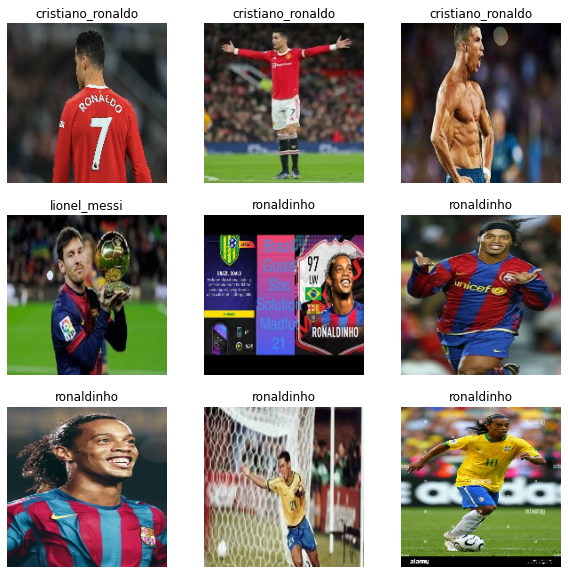

In [14]:
# Untuk menampilkan preview dataset training, dapat digunakan matplotlib

# lihat dataset training
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
 for i in range(9):
   ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.title(class_names[labels[i]])
   plt.axis("off")

##### perlihatkan dimensi

In [15]:
# Perlihatkan shape untuk data training. Shape memperlihatkan dimensi dari data. 

for image_batch, labels_batch in train_ds:
 print(image_batch.shape)
 print(labels_batch.shape)
 break

(32, 180, 180, 3)
(32,)


##### set cache buffer

In [16]:
# Selanjutnya set cache buffer untuk meningkatkan efisiensi training. Dengan cache di memory, dataset dan model dapat
# disimpan di memory (bukan hard disk), sehingga akses untuk training akan lebih cepat.

AUTOTUNE = tf.data.AUTOTUNE
 
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##### normalisasi nilai RGB

In [17]:
# Karena nilai RGB berada di kisaran  [0 sd 255] maka perlu dinormalisasi menjadi [0,1] dengan layer rescaling.
# Code berikut memperlihatkan prosesnya.
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.0 1.0


##### Buat arsitektur model
##### Kita coba tambah layer nya

In [18]:
# Sekarang kita mulai akan buat arsitektur deep learning untuk task ini.
num_classes = len(class_names)
 
model = Sequential([
 layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(256, activation='relu'),
 layers.Dense(num_classes)
 ])

# Layer pertama adalah rescaling untuk normalisasi RGB dari [0..255] menjadi [0..1]. 
# Ada parameter input_shape karena ini adalah layer pertama. 

# Layer berikutnya adalah Conv2D.


##### Compile

In [19]:
# Setelah arsitektur CNN didefinisikan, struktur tersebut kemudian di-compile
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
# Adam adalah optimizer untuk proses train.

##### ringkasan

In [20]:
# Selanjutnya kita lihat ringkasan arsitektur neural network  dengan summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

##### train data

In [21]:
# Berikutnya proses train. Proses ini dapat memerlukan waktu yang lama. Semakin bagus hardware, 
# semakin cepat proses trainingnya.
epochs=10
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)

# Satu epoch berarti proses sudah melewati semua dataset. Nilai ini menggambarkan berapa kali dataset diproses dalam proses 
# training. 

# Setiap akhir epoch, bobot dan bias model diupdate untuk meminimalkan loss function. Evaluasi juga dilakukan pada 
# dataset validasi pada akhir epoch. Jumlah epoch harus dicari yang paling optimal, terlalu sedikit model belum 
# konvergen tapi terlalu banyak akan menyebabkan proses training menjadi lama tanpa peningkatan kinerja.


Epoch 1/10
34/34 [==============================] - 5s 57ms/step - loss: 1.2550 - accuracy: 0.4114 - val_loss: 1.0774 - val_accuracy: 0.4962
Epoch 2/10
34/34 [==============================] - 1s 25ms/step - loss: 1.0221 - accuracy: 0.5848 - val_loss: 0.9395 - val_accuracy: 0.6165
Epoch 3/10
34/34 [==============================] - 1s 25ms/step - loss: 0.8225 - accuracy: 0.6757 - val_loss: 0.8488 - val_accuracy: 0.6955
Epoch 4/10
34/34 [==============================] - 1s 28ms/step - loss: 0.6248 - accuracy: 0.7582 - val_loss: 0.7127 - val_accuracy: 0.7293
Epoch 5/10
34/34 [==============================] - 1s 26ms/step - loss: 0.4646 - accuracy: 0.8257 - val_loss: 0.7441 - val_accuracy: 0.7030
Epoch 6/10
34/34 [==============================] - 1s 25ms/step - loss: 0.3163 - accuracy: 0.8922 - val_loss: 0.5763 - val_accuracy: 0.7707
Epoch 7/10
34/34 [==============================] - 1s 25ms/step - loss: 0.2180 - accuracy: 0.9325 - val_loss: 0.7368 - val_accuracy: 0.8008
Epoch 8/10
34

Pada output di atas, val_loss dan val_accuracy adalah nilai loss dan nilai akurasi untuk dataset validasi (val=validation). Sedangkan loss dan accuracy adalah nilai untuk dataset training. Loss menggambarkan jarak antara hasil saat ini dengan hasil yang diinginkan. Semakin kecil loss semakin bagus (artinya output neural network semakin mendekati target). Ukuran kinerja yang perlu digunakan adalah kinerja pada dataset validasi. Ini disebabkan dataset validasi adalah dataset yang tidak ada di data training, sehingga lebih menggambarkan kinerja model lebih akurat.



##### Plot

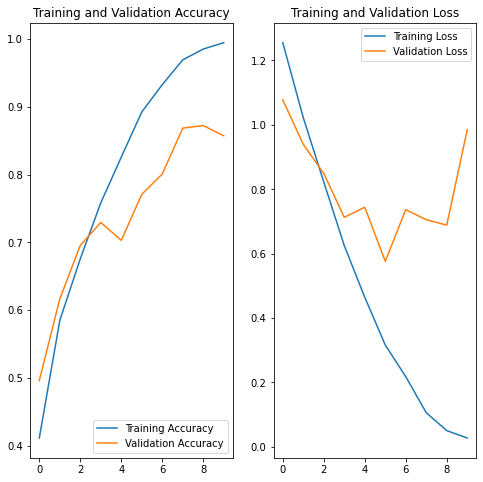

In [22]:
# Plot hasil training supaya lebih jelas. 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Dapat dilihat untuk kinerja data training hasilnya bagus tetapi untuk data validasi masih buruk. Ini menandakan terjadi overfit. Overfit adalah model hanya bagus (fit) untuk data training saja.


#####  augmentasi data training

In [23]:
# Salah satu penanganan overfitting pada deep learning adalah dengan augmentasi data training. 
# Pada proses augmentasi data yang sama secara random posisinya sedikit diubah.

data_augmentation = keras.Sequential(
 [
   layers.RandomFlip("horizontal",
                     input_shape=(img_height,
                                 img_width,
                                 3)),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.1),
 ]
)


##### Test visual

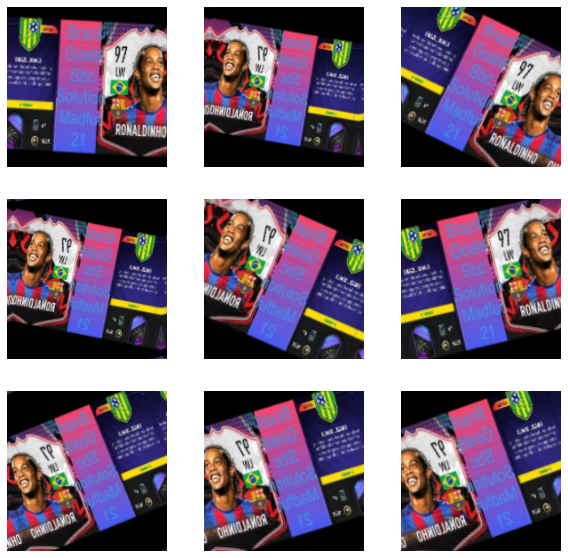

In [24]:
# Coba test secara visual
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
 for i in range(9):
   augmented_images = data_augmentation(images)
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(augmented_images[0].numpy().astype("uint8"))
   plt.axis("off")

##### Dropout juga dapat ditambahkan

In [25]:
model = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.3),
 layers.Flatten(),
 layers.Dense(256, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])

# Dropout adalah teknik sederhana tapi efektif untuk mengurangi overfitting. 
# Cara kerjanya adalah dengan men-set secara random berdasarkan probabilitas tertentu input unit 
# dengan nilai 0 pada saat update bobot. Efeknya adalah unit ini di-"drop" (seolah-olah update bobotnya dianulir) 
# yang menyebabkan noise dan dapat mengurangi overfitting. Dropout umumnya diset 0.2 -  0.5 (probabilitas suatu unit didrop).


##### compile dan training ulang

In [26]:
# Compile ulang
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# lakukan kembali training.
epochs = 20
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)


Epoch 1/20
34/34 [==============================] - 2s 46ms/step - loss: 1.2620 - accuracy: 0.3946 - val_loss: 1.0512 - val_accuracy: 0.5263
Epoch 2/20
34/34 [==============================] - 1s 41ms/step - loss: 1.0387 - accuracy: 0.5736 - val_loss: 1.0950 - val_accuracy: 0.5113
Epoch 3/20
34/34 [==============================] - 1s 42ms/step - loss: 0.9727 - accuracy: 0.5923 - val_loss: 0.9828 - val_accuracy: 0.5827
Epoch 4/20
34/34 [==============================] - 1s 42ms/step - loss: 0.9308 - accuracy: 0.6270 - val_loss: 0.8701 - val_accuracy: 0.6466
Epoch 5/20
34/34 [==============================] - 1s 41ms/step - loss: 0.8630 - accuracy: 0.6635 - val_loss: 0.9112 - val_accuracy: 0.6391
Epoch 6/20
34/34 [==============================] - 1s 42ms/step - loss: 0.8033 - accuracy: 0.6832 - val_loss: 0.8242 - val_accuracy: 0.6880
Epoch 7/20
34/34 [==============================] - 1s 41ms/step - loss: 0.7865 - accuracy: 0.7010 - val_loss: 0.8654 - val_accuracy: 0.6541
Epoch 8/20
34

##### Plot

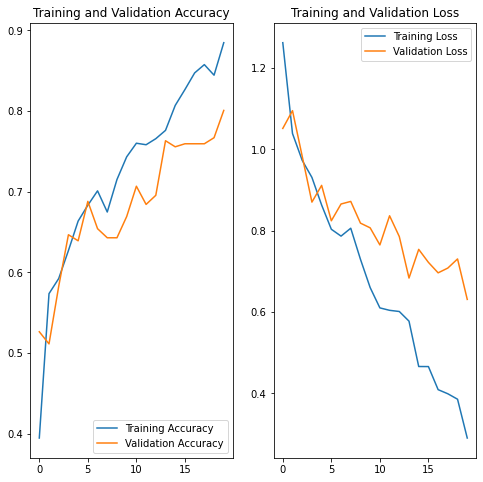

In [27]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Hasilnya dapat dilihat data validasi loss (oranye) jauh membaik dibandingkan sebelumnya. 


##### memprediksi kelas pemain dari foto yang belum pernah dilihat sebelumnya

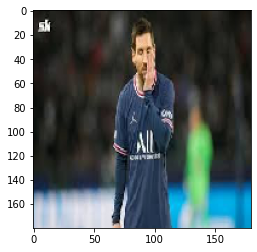

In [28]:
# Berikut adalah contoh code untuk memprediksi kelas pemain dari foto yang belum pernah dilihat sebelumnya 
# (tidak digunakan dalam data training, validasi dan testing)
#image_baru_path = "/content/train/football_golden_foot/football_golden_foot/cristiano_ronaldo/03eacf0178.jpg" #100%
image_baru_path = "/content/train/football_golden_foot/football_golden_foot/lionel_messi/1234054007.jpg" #82%

img = tf.keras.utils.load_img(
   image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

##### Lakukan prediksi siapa pemain bola ini.

In [29]:

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
 
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
 
print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 156ms/step
This image most likely belongs to lionel_messi with a 72.23 percent confidence.


#### Dapat dilihat hasilnya cukup memuaskan, hasil tebakan outputnya sesuai dengan gambar walaupun confidence nya tidak terlalu tinggi 